***

# <b style='color:green;'> Overall Picture </b>

In this notebook you will find a simple guide in how to start from zero in analyzing data. The guiding steps are as follows:
- <b> Data Gathering </b>
- <b> Data Understanding </b>
- <b> Data Manipulation </b>

Let's get right into that!

***

# <b style='color:#FF00FF;'> Data Gathering </b>

<b> STEP I </b>: Import Packages and Data

In [ ]:
# Import Packages (an open to everyone library which offers functions for handling data)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Import Dataset, in this case in csv (comma seperated values) format
df = pd.read_csv("Hackathon_Ideal_Data.csv")

<b> Step 2:</b> General Schema Comprehension

In [ ]:
# List of the columns and corresponding types
df.dtypes

MONTH        object
STORECODE    object
QTY           int64
VALUE         int64
GRP          object
SGRP         object
SSGRP        object
CMP          object
MBRD         object
BRD          object
dtype: object

In [ ]:
# Sample of the data from the top (first rows)
df.head(5)

,MONTH,STORECODE,QTY,VALUE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,P1,25,83,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE HAIR FALL RESCUE
1,M1,P1,6,22,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE INTENSE REPAIR
2,M1,P1,4,15,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE OXYGEN MOISTURE
3,M1,P1,15,60,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,L'OREAL INDIA,GARNIER,FRUCTIS
4,M1,P2,0,0,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,CLINIC PLUS,CLINIC PLUS


In [ ]:
# Sample of the data from the end (last rows)
df.tail(5)

,MONTH,STORECODE,QTY,VALUE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
14255,M3,P10,0,0,SUGAR SUBSTITUTE (11/05),POWDER (SUGAR SUBST),POWDER (SUGAR SUBST),ZYDUS WELLNESS LTD,SUGAR FREE,SUGAR FREE GOLD
14256,M3,P8,1,62,SUGAR SUBSTITUTE (11/05),PELLETS (SUGAR SUBST),PELLETS (SUGAR SUBST),ZYDUS WELLNESS LTD,SUGAR FREE,SUGAR FREE GOLD
14257,M1,P6,0,0,SUGAR SUBSTITUTE (11/05),PELLETS (SUGAR SUBST),PELLETS (SUGAR SUBST),ZYDUS WELLNESS LTD,SUGAR FREE,SUGAR FREE GOLD
14258,M1,P10,0,0,SUGAR SUBSTITUTE (11/05),POWDER (SUGAR SUBST),POWDER (SUGAR SUBST),ZYDUS WELLNESS LTD,SUGAR FREE,SUGAR FREE GOLD
14259,M1,P8,1,62,SUGAR SUBSTITUTE (11/05),PELLETS (SUGAR SUBST),PELLETS (SUGAR SUBST),ZYDUS WELLNESS LTD,SUGAR FREE,SUGAR FREE GOLD


In [ ]:
# Shape, to get the data dimensionality (number of rows and columns, respectively)
df.shape

(14260, 10)

In [ ]:
# Describe, to get information about the dataset
df.describe()

,QTY,VALUE
count,14260.000000,14260.000000
mean,16.354488,294.455330
std,34.365583,760.129558
min,0.000000,0.000000
25%,1.000000,10.000000
50%,4.000000,99.000000
75%,16.000000,283.000000
max,641.000000,24185.000000


In [ ]:
# Info, a short summary of the dataset (type of data, missing (null) values and memory consumption)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14260 entries, 0 to 14259
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MONTH      14260 non-null  object
 1   STORECODE  14260 non-null  object
 2   QTY        14260 non-null  int64 
 3   VALUE      14260 non-null  int64 
 4   GRP        14260 non-null  object
 5   SGRP       14260 non-null  object
 6   SSGRP      14260 non-null  object
 7   CMP        14260 non-null  object
 8   MBRD       14260 non-null  object
 9   BRD        14260 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.1+ MB


In [ ]:
# Order your data
df = df.sort_values(by=["MONTH", "STORECODE", "QTY"], ascending=False)

<b> STEP 3: </b> Data Cleaning

Questions to ask ourselves:
- Do we like the naming convention of the columns? Can we change that?
- Are there useless variables or repeated ones?
- Are there column with no variance at all? If yes, what to do with that?

In [ ]:
# Do we like the naming convention?
# Selection and renaming of relevant columns
list_rel_cols = ["MONTH", "STORECODE", "QTY", "VALUE", "GRP", "CMP", "MBRD"]
df_red = df[list_rel_cols]
df_red = df_red.rename(
  columns={"MBRD": "BRAND"}
)

In [ ]:
# Are there duplicate columns?
df.duplicated().sum()

0

In [ ]:
# Are there missing values?
df.isnull().sum()

MONTH        0
STORECODE    0
QTY          0
VALUE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64

# <b style='color:#FF00FF;'>Data Understanding: a visual deep dive </b>

## <b style='color:#AA336A;'>Categorical Features </b>

In [ ]:
# What is the timespan of the analysis?

df_red.value_counts(subset=["MONTH"])

MONTH
M2       4816
M1       4804
M3       4640
dtype: int64

In [ ]:
# Can we express that data in %? Make use of the parameter normalize=True

df_red.value_counts(subset=["MONTH"], normalize=True)

MONTH
M2       0.337728
M1       0.336886
M3       0.325386
dtype: float64

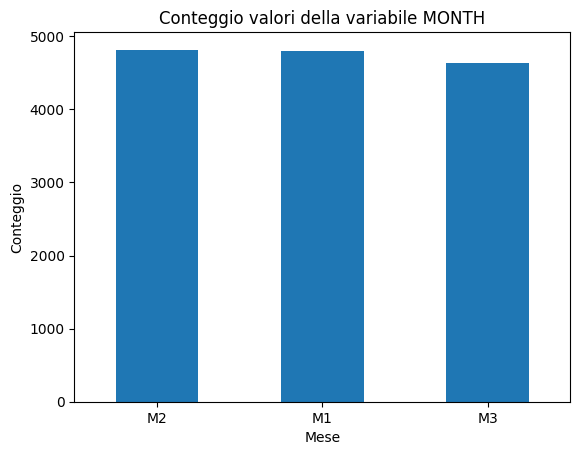

In [ ]:
# Aggiungiamo un grafico (a seconda della colonna che andremo a plottare ha senso dare un ordine):

df.MONTH.value_counts().plot(kind="bar")
plt.title("Conteggio valori della variabile MONTH")
plt.xlabel("Mese")
plt.xticks(rotation=0)
plt.ylabel("Conteggio")
plt.show()

In [ ]:
# How many brands do we have?

df_red.value_counts(subset=["BRAND"])

BRAND         
EVEREST           583
DOVE              302
HALDIRAM          190
LIFEBUOY          190
LUX               176
                 ... 
COCOPLUS            1
PRABHU DARSHAN      1
ABHISHEK            1
COFFY BITE          1
PARLE KISMI         1
Length: 818, dtype: int64

In [ ]:
# How many stores do we have?

df_red.value_counts(subset=["STORECODE"])

STORECODE
P8           2642
P6           2097
P10          1508
P2           1471
P4           1454
P3           1362
P9           1188
P1           1061
P7            850
P5            627
dtype: int64

<Axes: xlabel='STORECODE', ylabel='count'>

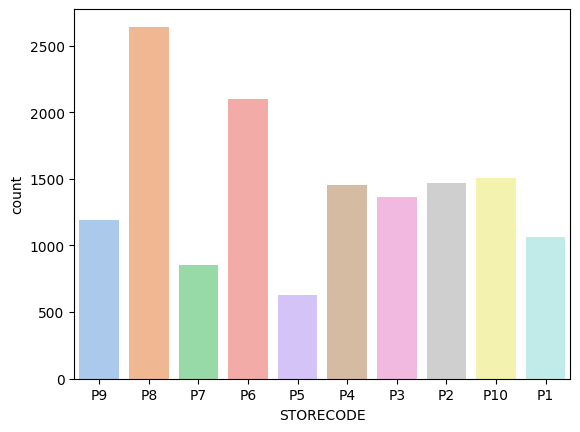

In [ ]:
# Can we compare them in a plot?

sns.countplot(data=df_red, x="STORECODE", palette=sns.color_palette("pastel"))

<Axes: xlabel='count', ylabel='STORECODE'>

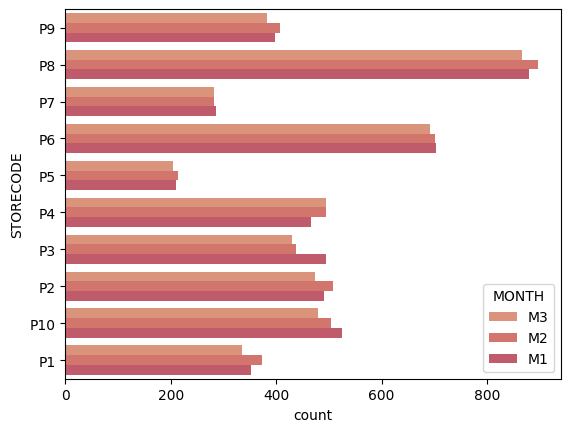

In [ ]:
# Can we compare them in a plot with months detail?

sns.countplot(data=df_red, y="STORECODE", hue="MONTH", palette=sns.color_palette("flare"))

In [ ]:
# Is there a common association of store and brand?

df_red.value_counts(subset=["STORECODE", "BRAND"])

STORECODE  BRAND   
P8         HALDIRAM    76
P3         EVEREST     68
P6         HALDIRAM    66
P7         EVEREST     64
P1         EVEREST     63
                       ..
P6         GO           1
P2         GILLETTE     1
P6         DRAIN IT     1
P10        ARIEL        1
P3         MARGO        1
Length: 2648, dtype: int64

## <b style='color:#AA336A;'> Numerical Features </b>

<Axes: >

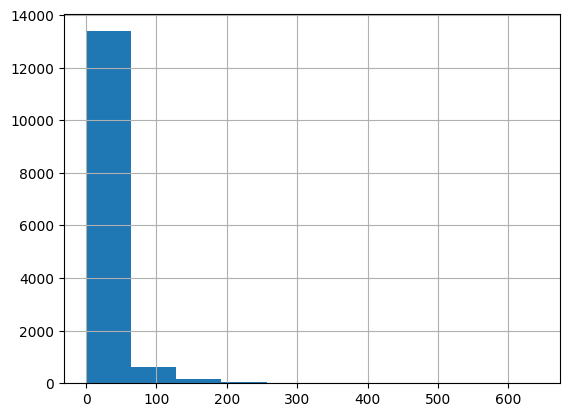

In [ ]:
# Plot the distribution of a numerical feature

df_red.QTY.hist()

<Axes: >

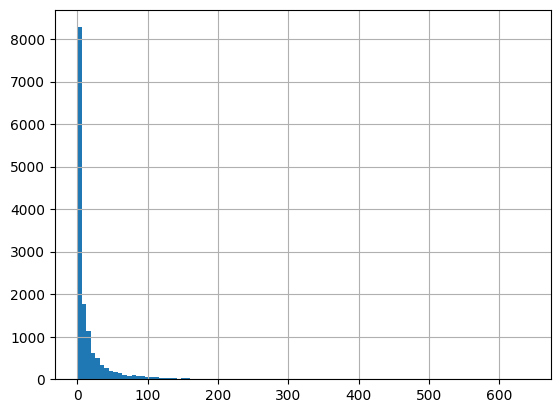

In [ ]:
# Plot the distribution of a numerical feature with an highet number of bins

df_red.QTY.hist(bins=100)

array([[<Axes: title={'center': 'M1'}>, <Axes: title={'center': 'M2'}>],
       [<Axes: title={'center': 'M3'}>, <Axes: >]], dtype=object)

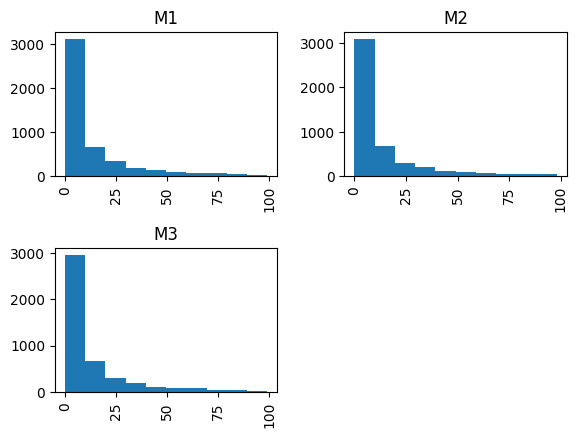

In [ ]:
# Plot the distribution of a numerical feature split by month, keeping only QTY < 100

df_red.loc[df_red["QTY"] < 100].hist(column="QTY", bins=10, by="MONTH")

In [ ]:
# Calcoliamo media, mediana e dev standard della variabile
print(f"Media: {df_red['QTY'].mean()}")
print(f"Mediana: {df_red['QTY'].median()}")
print(f"Deviazione standard: {df_red['QTY'].std()}")

Media: 16.354488078541376
Mediana: 4.0
Deviazione standard: 34.365582663643224


In [ ]:
# Valutiamo curtosi e asimmetria della distribuzione
print(f"Curtosi: {df_red['QTY'].kurt()}")
print(f"Asimmetria: {df_red['QTY'].skew()}")

Curtosi: 51.73488584811271
Asimmetria: 5.537580454416803


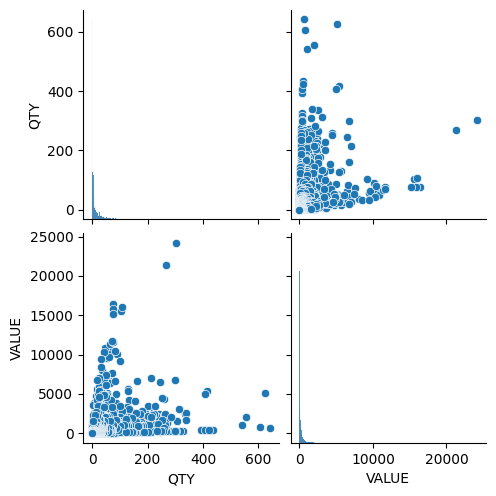

In [ ]:
# studio delle relazione tra variabili
sns.pairplot(df_red)

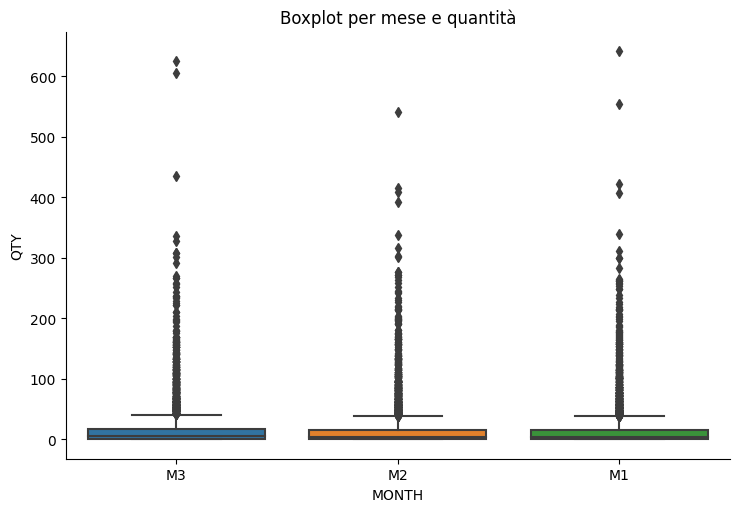

In [ ]:
# Comprendere la relazione tra una variabile numerica e variabile categoriale attraverso un boxplot (con il dataset definitivo andrà fatto uno storytelling per dare un senso alla sequenza di step)

sns.catplot(x="MONTH", y="QTY", data=df, kind="box", aspect=1.5)
plt.title("Boxplot per mese e quantità")
plt.show()

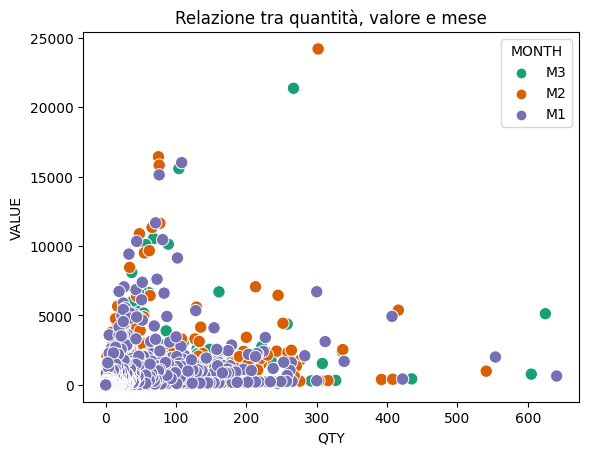

In [ ]:
# Grafico per specificare a quale mese (var. categorica/classe appartiene a un punto)

sns.scatterplot(x="QTY", y="VALUE", hue="MONTH", data=df_red, palette="Dark2", s=80)
plt.title("Relazione tra quantità, valore e mese")
plt.show()

<ipython-input-40-09f4a8d8b9f1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df_red.corr()


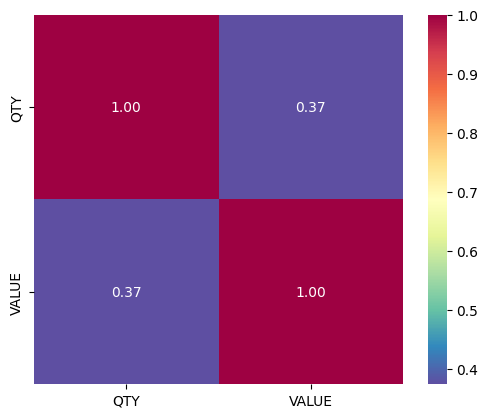

In [ ]:
# Mappa di calore per identificare le variabili più correlate tra loro

corrmat = df_red.corr()
hm = sns.heatmap(corrmat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 cmap="Spectral_r")
plt.show()

***

# <b style='color:#FF00FF;'> Data Manipulation </b>

Basic manipulation commands


In [ ]:
# We observe that some QTY and some VALUE are null, they do not add information so we filter them away, logging how many exclusions we are making

print(f"Original Number of Rows: {df_red.count()}")

df_filtered = df_red.loc[(df_red["QTY"] > 0) & (df_red["VALUE"] > 0)]

print(f"Number of Rows after filter: {df_filtered.count()}")

Original Number of Rows: MONTH        14260
STORECODE    14260
QTY          14260
VALUE        14260
GRP          14260
CMP          14260
BRAND        14260
dtype: int64
Number of Rows after filter: MONTH        10922
STORECODE    10922
QTY          10922
VALUE        10922
GRP          10922
CMP          10922
BRAND        10922
dtype: int64


In [ ]:
# Add a column with overall spending for each record

df_filtered["OVERALL_SPENDING"] = df_filtered["QTY"] * df_filtered["VALUE"]

<ipython-input-60-f940ca16fbda>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["OVERALL_SPENDING"] = df_filtered["QTY"] * df_filtered["VALUE"]


In [ ]:
# For each store, we can extract some stats over the total amount spent

df_grouped = (
    df_filtered
    .groupby(by=["STORECODE", "MONTH"])
    .agg({"OVERALL_SPENDING": [np.mean, np.min, np.max, np.median]})
)
df_grouped

OVERALL_SPENDING                      
                            mean amin     amax  median
STORECODE MONTH                                       
P1        M1        15290.144737    4  1112986  1500.5
          M2        12536.463190   10   416290  1320.0
          M3        12517.007143   15   613164  1442.5
P10       M1        13511.047486    4   593451   750.0
          M2         7524.173267    5   493350   810.0
          M3        13329.923288    5   807408   812.0
P2        M1         7455.645646    1   171125   546.0
          M2         4487.456140    5   173512   574.5
          M3         6229.839344    2   314304   504.0
P3        M1        19414.803069    6   828002  2058.0
          M2        20553.511236   11   895895  1925.5
          M3        20043.895028    5  1619384  1514.5
P4        M1        26958.795014    5   931872  1812.0
          M2        28535.183562    5  1118376  2148.0
          M3        27403.002778    5  1130040  2020.0
P5        M1        30944.802885    5   244437  7812.0
          M2        34460.086957    9   420370  8085.0
          M3        38741.275000    4   364500  9424.0
P6        M1         8014.449153   11   555676   597.0
          M2        10543.356455    5   535590   963.0
          M3         9902.672828    5  1078700   897.0
P7        M1        55580.404167   16  2012400  2705.5
          M2        92208.585062   19  7303870  2608.0
          M3        46792.963855   21  5700984  3082.0
P8        M1        13424.409449    3  1149120   972.0
          M2        11319.362218    4  1202320   810.0
          M3        11306.539394    8   405528  1120.0
P9        M1        17066.037037    5  2008545   819.0
          M2        15942.500000    4  1231875  1149.5
          M3        27254.400000    6  3203750  1290.0